**TASK 1:
 Apply multiple regression to another dataset of your own choice. Try for different train-test split and random states.**

In [54]:
from google.colab import files
uploaded = files.upload

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [56]:
dataset = pd.read_csv('Student_Performance.csv')
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [58]:
dataset.describe

<bound method NDFrame.describe of       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced  Performance Index  
0                                    1               91.0  
1                                    2               65.0  
2                                    2               45.0  
3                                    2               36.0  
4                                    5               66.0  
...                                ...                ...  
9995                                 2               23.0  
9996                                 5               58.0  
9997                                 5               74.0  
9998                                 0               95.0  
9999                                 1               64.0  

[10000 rows x 6 columns]>

In [59]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [60]:
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2])], remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train.shape

(8000, 6)

In [62]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [63]:
y_pred = multi_regressor.predict(X_test)

In [64]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[-0.30430834  0.30430834  2.85248393  1.0169882   0.47694148  0.19183144]
-33.61763787576806


In [65]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 0.9889832909573145


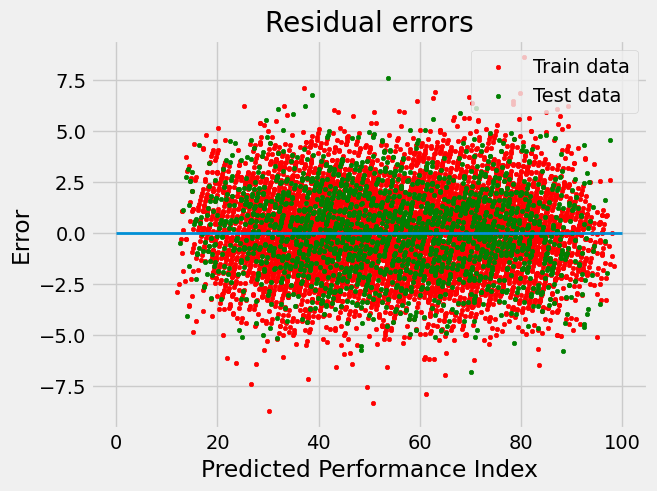

In [66]:
plt.style.use('fivethirtyeight')
plt.scatter(multi_regressor.predict(X_train), multi_regressor.predict(X_train)-y_train, color = "red", s = 10, label = 'Train data')
plt.scatter(multi_regressor.predict(X_test), multi_regressor.predict(X_test)-y_test, color = "green", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 100, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Predicted Performance Index")
plt.ylabel("Error")
plt.show()

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.6111213463123049
MSE: 4.082628398521859
RMSE: 2.0205515085050068


**TASK 2:
For the given dataset (or for a dataset of your choice), run multiple regression on a subset of predictors and observe the differences in your model’s performance.**

In [68]:
subset_features = dataset[['Hours Studied', 'Previous Scores', 'Sleep Hours']]

In [69]:
X_subset = subset_features.values

In [70]:
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y, test_size=0.2, random_state=42)

In [71]:
subset_regressor = LinearRegression()
subset_regressor.fit(X_train_subset, y_train_subset)

LinearRegression()

In [72]:
y_pred_subset = subset_regressor.predict(X_test_subset)

In [73]:
print(subset_regressor.coef_)
print(subset_regressor.intercept_)

[2.85591758 1.01737929 0.47339139]
-32.75639950098351


In [74]:
print('Variance score: {}'.format(subset_regressor.score(X_test_subset, y_test_subset)))

Variance score: 0.9877353198949831


In [75]:
print('MAE:', metrics.mean_absolute_error(y_test_subset, y_pred_subset))
print('MSE:', metrics.mean_squared_error(y_test_subset, y_pred_subset))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_subset, y_pred_subset)))

MAE: 1.704408432140127
MSE: 4.545107899420574
RMSE: 2.1319258663050586


In [76]:
# Observing differences

mae_full = metrics.mean_absolute_error(y_test, y_pred)
mse_full = metrics.mean_squared_error(y_test, y_pred)
rmse_full = np.sqrt(mse_full)

mae_subset = metrics.mean_absolute_error(y_test_subset, y_pred_subset)
mse_subset = metrics.mean_squared_error(y_test_subset, y_pred_subset)
rmse_subset = np.sqrt(mse_subset)

print("MAE Difference:", mae_full - mae_subset)
print("MSE Difference:", mse_full - mse_subset)
print("RMSE Difference:", rmse_full - rmse_subset)

MAE Difference: -0.09328708582782208
MSE Difference: -0.4624795008987155
RMSE Difference: -0.11137435780005189


**TASK 3: Determine the performance metrics and generate a plot for polynomial regression by selecting one predictor at a time from the given dataset. Set different values of degree of polynomial to observe the variations.**

In [109]:
given_dataset = pd.read_csv('50_Startups.csv')

In [110]:
y_new = given_dataset['Profit']
X_new = given_dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]

In [111]:
ct_new = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [3])], remainder='passthrough')
X_new = np.array(ct_new.fit_transform(X_new))

In [113]:
encoded_feature_names_new = ct_new.named_transformers_['encoder'].get_feature_names_out(['State'])
predictor_names_new = ['R&D Spend', 'Administration', 'Marketing Spend'] + list(encoded_feature_names_new)

In [114]:
degrees = [2, 3, 4]


Polynomial Regression with R&D Spend (Degree 2):
MSE: 370.2413696204843
MAE: 16.206967341913447
RMSE: 19.241657143304582


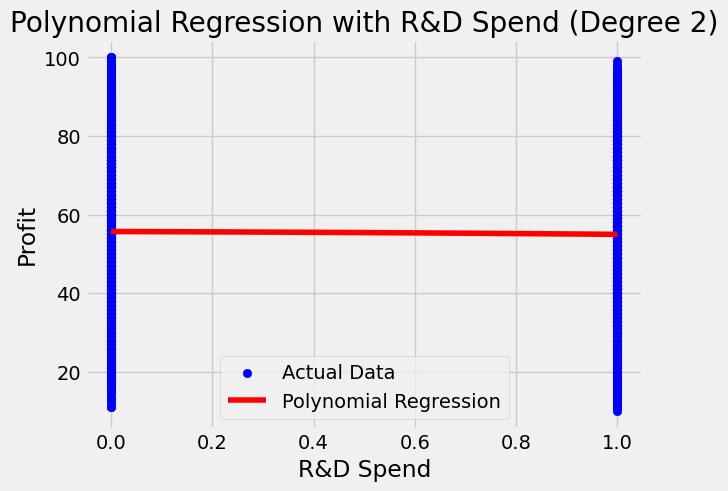


Polynomial Regression with R&D Spend (Degree 3):
MSE: 370.24136962048425
MAE: 16.206967341913447
RMSE: 19.241657143304582


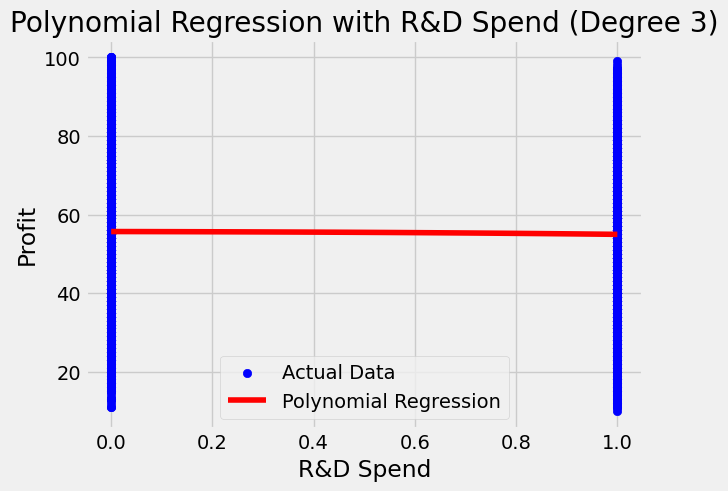


Polynomial Regression with R&D Spend (Degree 4):
MSE: 370.24136962048425
MAE: 16.206967341913447
RMSE: 19.241657143304582


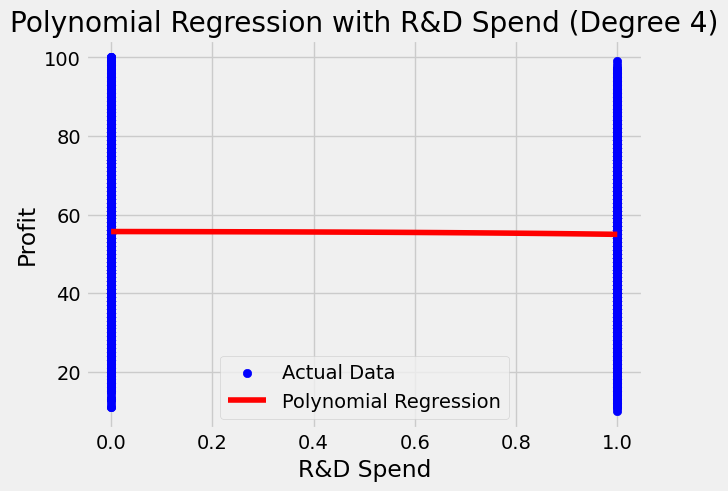


Polynomial Regression with Administration (Degree 2):
MSE: 370.2413696204843
MAE: 16.206967341913447
RMSE: 19.241657143304582


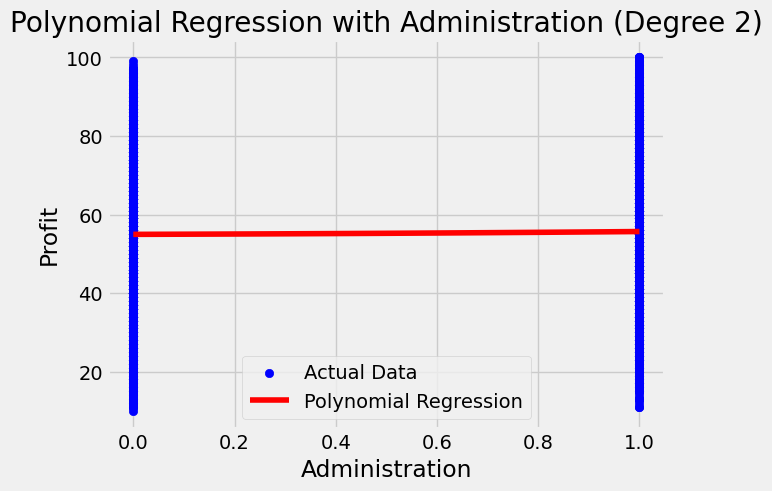


Polynomial Regression with Administration (Degree 3):
MSE: 370.24136962048425
MAE: 16.206967341913447
RMSE: 19.241657143304582


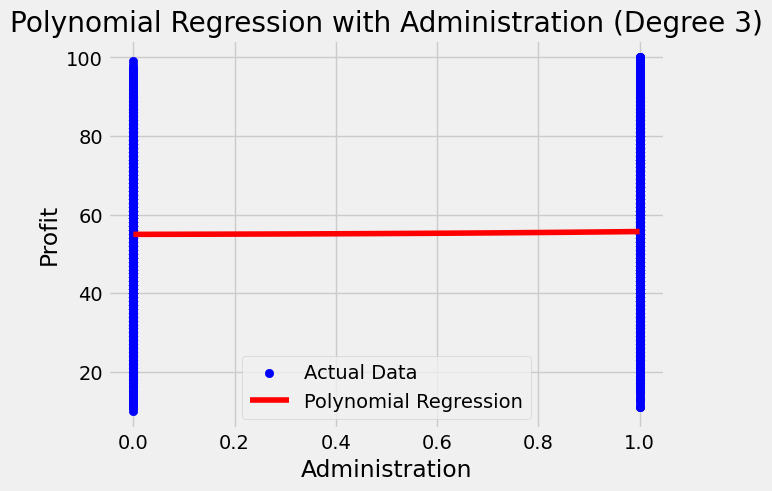


Polynomial Regression with Administration (Degree 4):
MSE: 370.24136962048425
MAE: 16.206967341913447
RMSE: 19.241657143304582


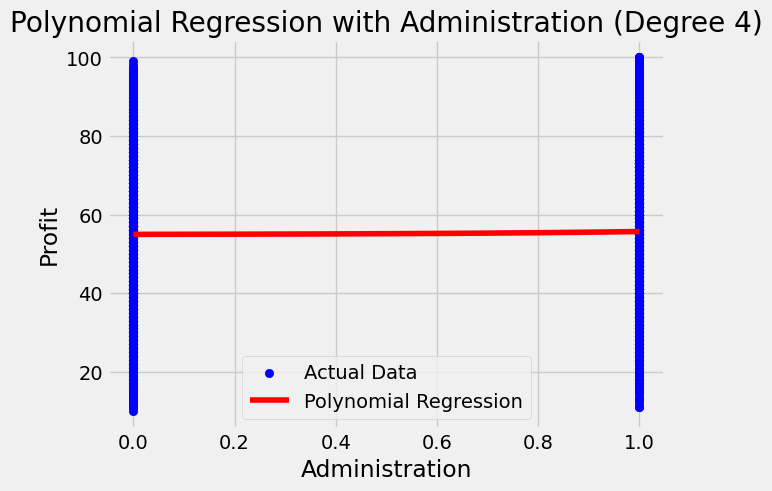


Polynomial Regression with Marketing Spend (Degree 2):
MSE: 322.00416498930946
MAE: 15.53878702202471
RMSE: 17.94447449744097


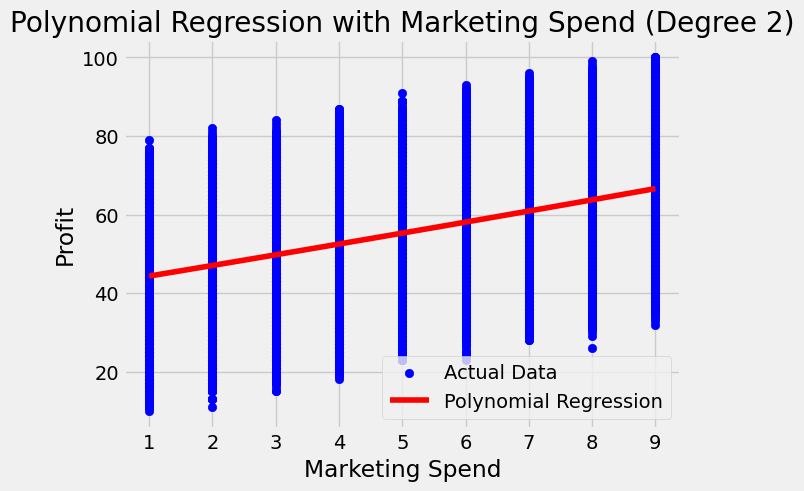


Polynomial Regression with Marketing Spend (Degree 3):
MSE: 322.08806624065994
MAE: 15.540678006752508
RMSE: 17.946812147026556


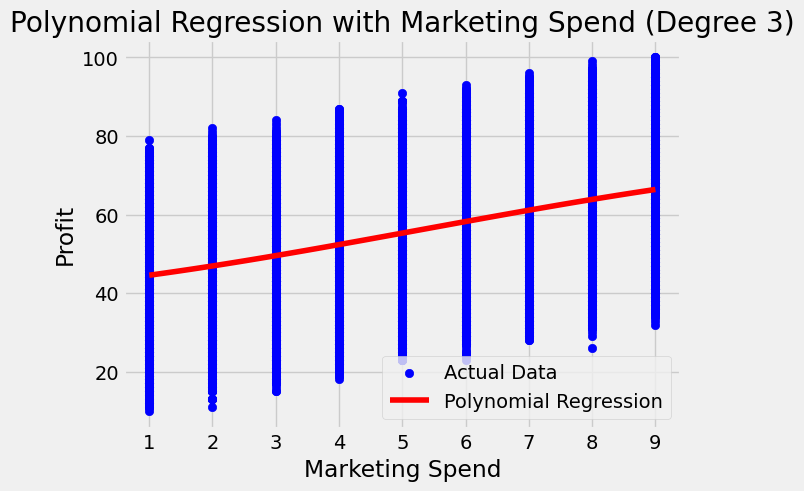


Polynomial Regression with Marketing Spend (Degree 4):
MSE: 322.1816642352957
MAE: 15.546105425467918
RMSE: 17.949419607198884


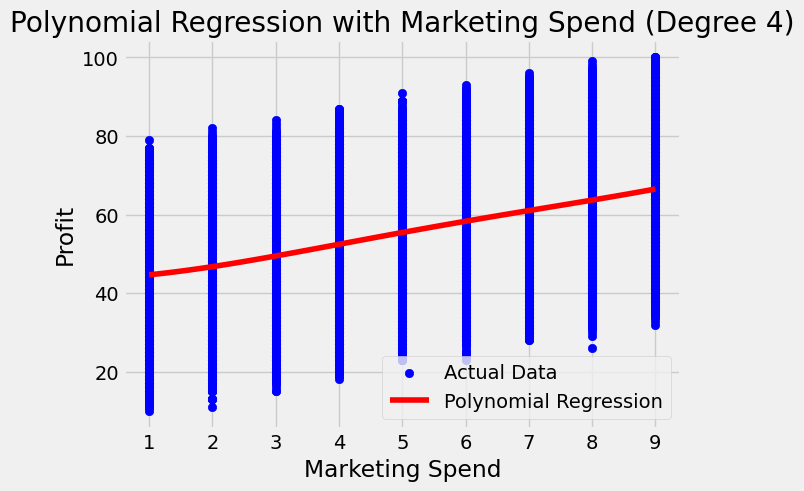


Polynomial Regression with State_California (Degree 2):
MSE: 58.95250387765021
MAE: 6.558244972621786
RMSE: 7.6780533911695485


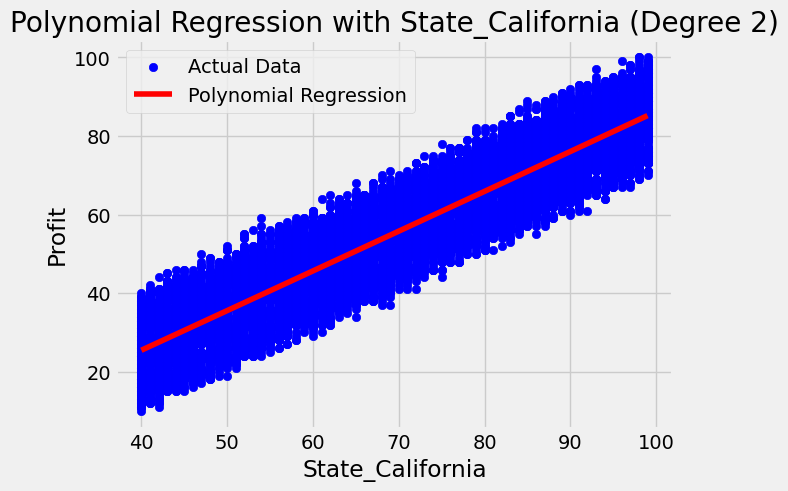


Polynomial Regression with State_California (Degree 3):
MSE: 58.95681130548586
MAE: 6.558659208886588
RMSE: 7.678333888643151


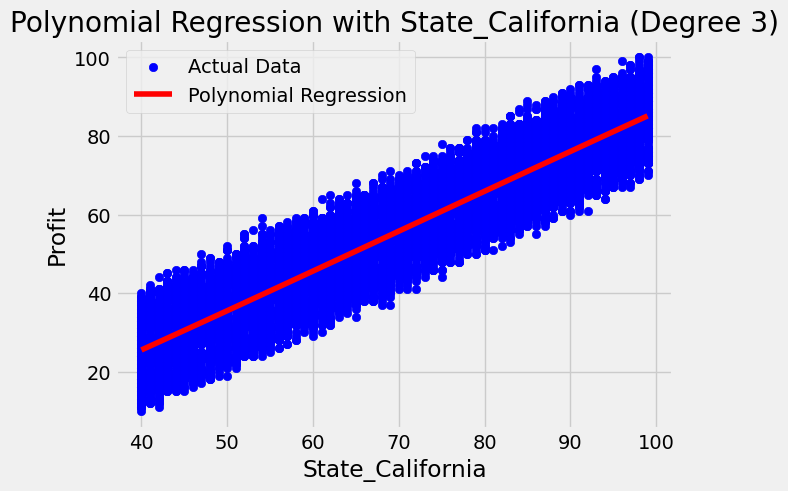


Polynomial Regression with State_California (Degree 4):
MSE: 58.92181676386396
MAE: 6.557357355180548
RMSE: 7.676054765559191


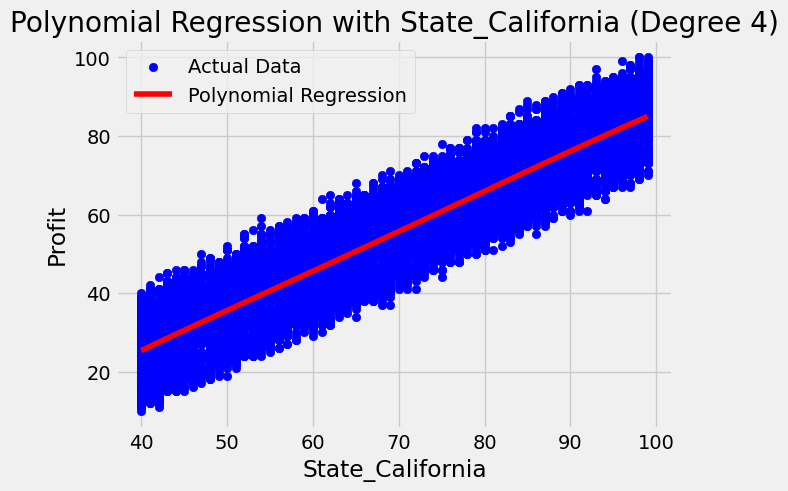


Polynomial Regression with State_Florida (Degree 2):
MSE: 369.5522839484476
MAE: 16.176029288007694
RMSE: 19.223742714374005


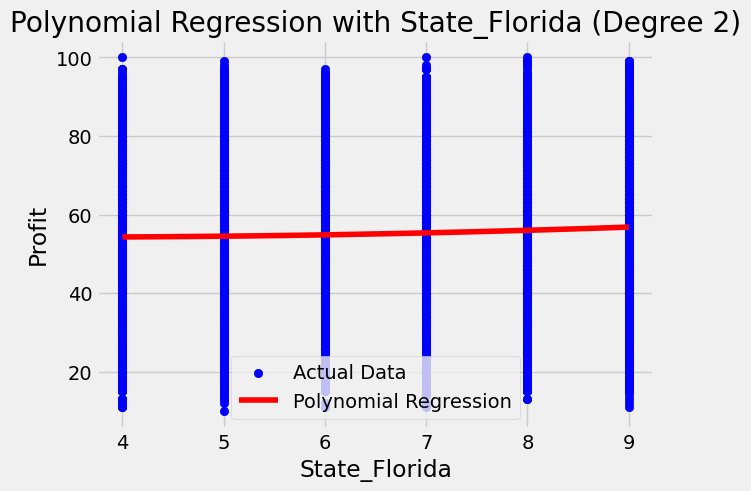


Polynomial Regression with State_Florida (Degree 3):
MSE: 369.622267448834
MAE: 16.17737057832797
RMSE: 19.22556286429175


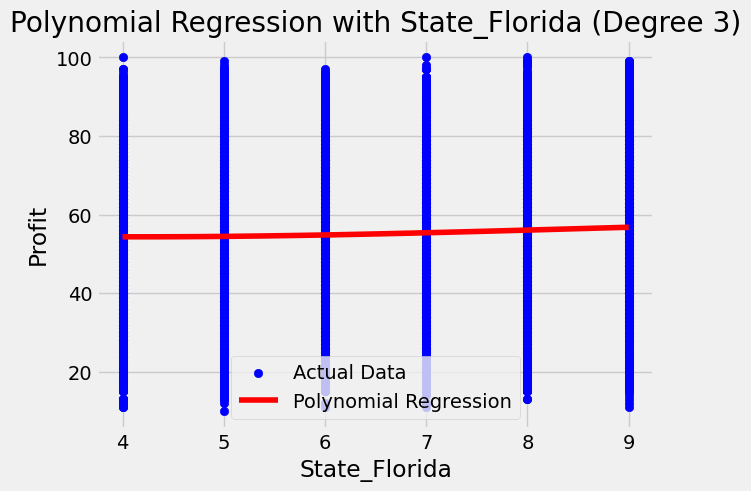


Polynomial Regression with State_Florida (Degree 4):
MSE: 369.8301726197493
MAE: 16.18058786970403
RMSE: 19.230969102459433


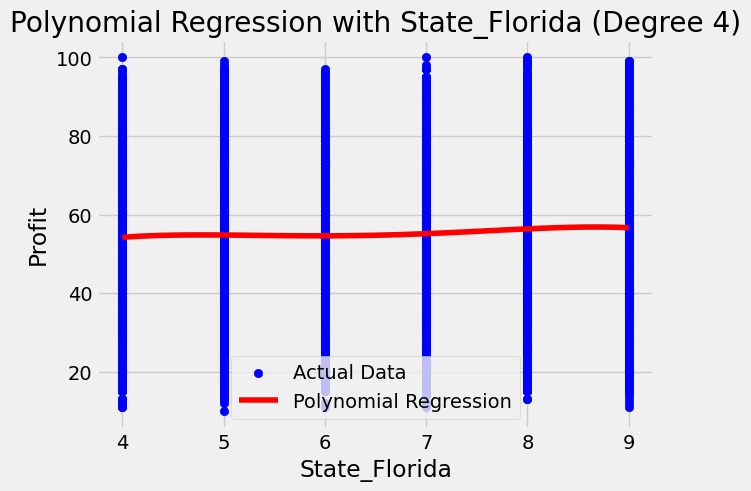


Polynomial Regression with State_New York (Degree 2):
MSE: 370.300408847242
MAE: 16.20952443432431
RMSE: 19.24319123345299


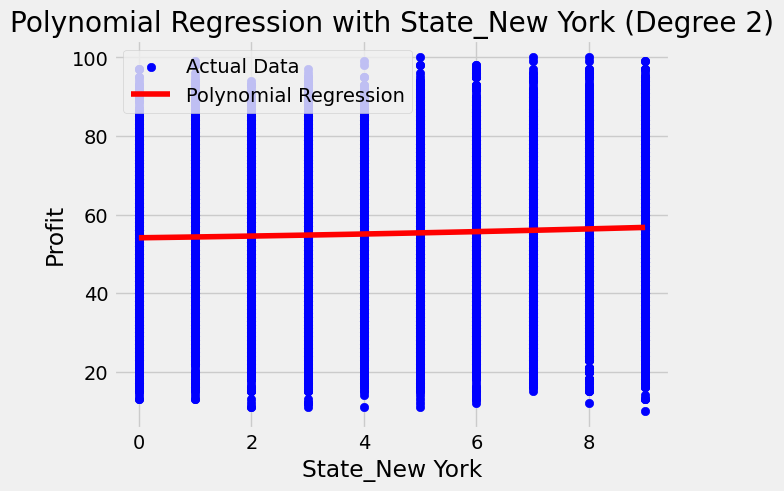


Polynomial Regression with State_New York (Degree 3):
MSE: 370.0392506493633
MAE: 16.204077636831908
RMSE: 19.23640430666197


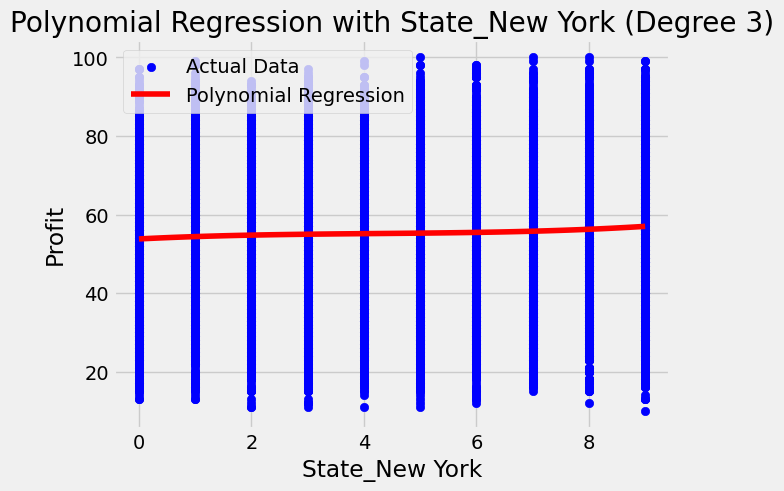


Polynomial Regression with State_New York (Degree 4):
MSE: 369.99307783520436
MAE: 16.202775468579116
RMSE: 19.235204127723843


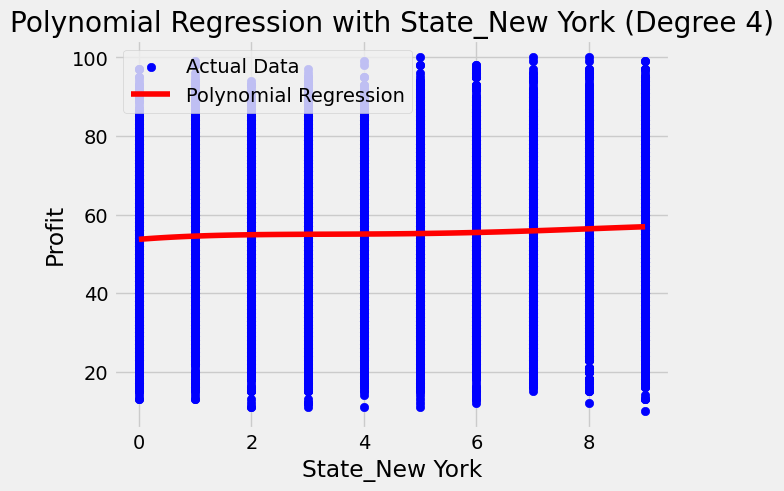

In [115]:
for i, predictor_name_new in enumerate(predictor_names_new):
    if predictor_name_new in ['R&D Spend', 'Administration', 'Marketing Spend'] or predictor_name_new in encoded_feature_names_new:
        for degree in degrees:

            poly_features = PolynomialFeatures(degree=degree)
            X_poly = poly_features.fit_transform(X[:, i].reshape(-1, 1))

            X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

            poly_regressor = LinearRegression()
            poly_regressor.fit(X_train_poly, y_train)

            y_pred = poly_regressor.predict(X_test_poly)

            print(f"\nPolynomial Regression with {predictor_name_new} (Degree {degree}):")
            print("MSE:", metrics.mean_squared_error(y_test, y_pred))
            print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
            print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

            X_plot = np.linspace(X[:, i].min(), X[:, i].max(), 100).reshape(-1, 1)
            X_plot_poly = poly_features.transform(X_plot)
            y_plot_poly = poly_regressor.predict(X_plot_poly)

            plt.scatter(X[:, i], y, color='blue', label='Actual Data')
            plt.plot(X_plot, y_plot_poly, color='red', label='Polynomial Regression')
            plt.title(f"Polynomial Regression with {predictor_name_new} (Degree {degree})")
            plt.xlabel(predictor_name_new)
            plt.ylabel("Profit")
            plt.legend()
            plt.show()

**TASK 4: For a dataset of your choice, repeat the same process for polynomial regression.**

In [116]:
y = dataset['Performance Index']
X = dataset[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]

In [117]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [118]:
encoded_feature_names = ct.named_transformers_['encoder'].get_feature_names_out(['Extracurricular Activities'])
predictor_names = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced'] + list(encoded_feature_names)

In [119]:
degrees = [2, 3, 4]


Polynomial Regression with Hours Studied (Degree 2):
MSE: 370.2413696204843
MAE: 16.206967341913447
RMSE: 19.241657143304582


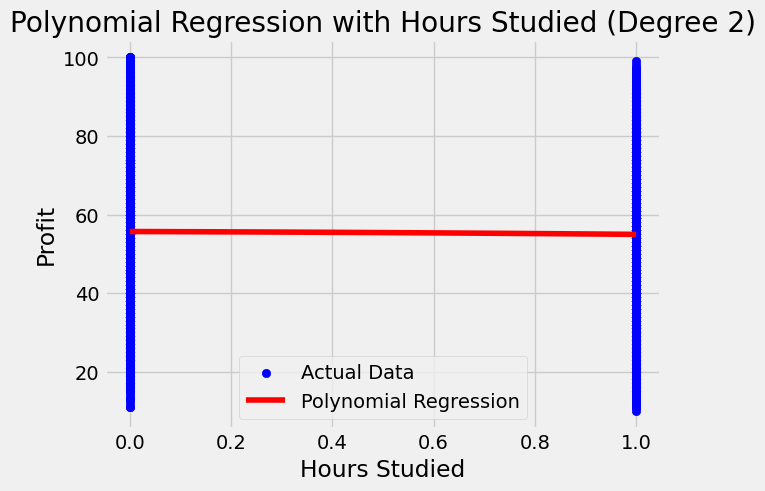


Polynomial Regression with Hours Studied (Degree 3):
MSE: 370.24136962048425
MAE: 16.206967341913447
RMSE: 19.241657143304582


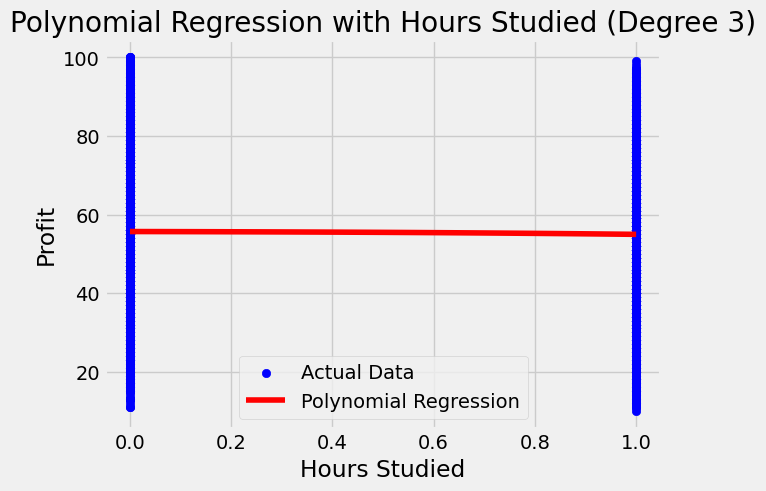


Polynomial Regression with Hours Studied (Degree 4):
MSE: 370.24136962048425
MAE: 16.206967341913447
RMSE: 19.241657143304582


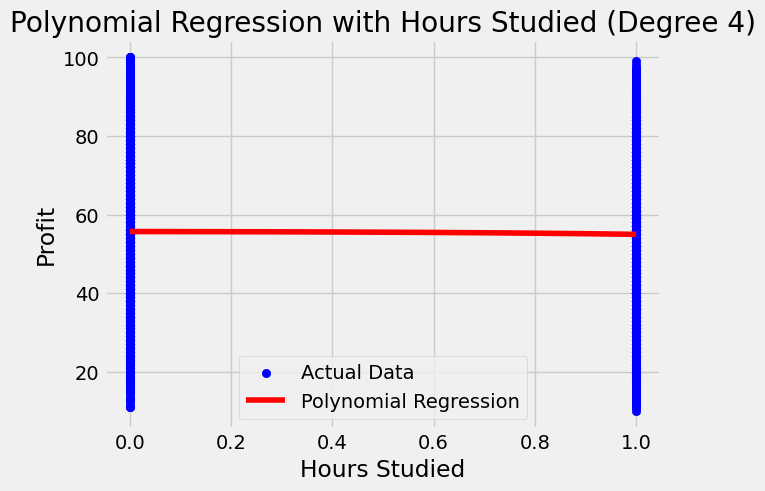


Polynomial Regression with Previous Scores (Degree 2):
MSE: 370.2413696204843
MAE: 16.206967341913447
RMSE: 19.241657143304582


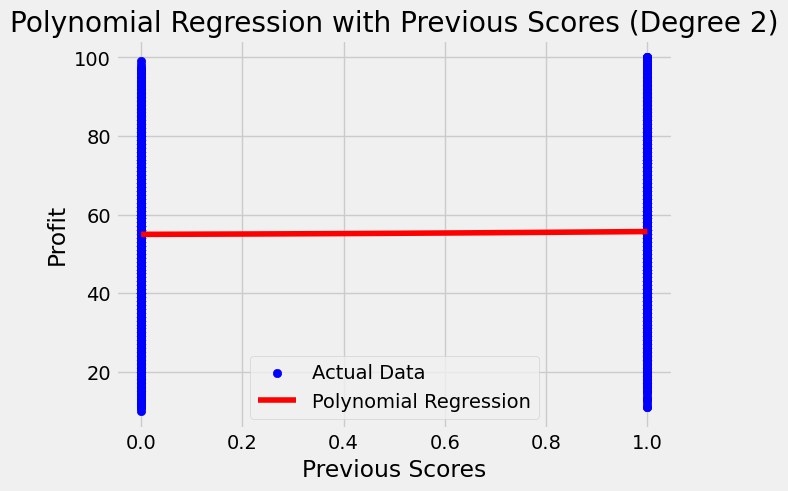


Polynomial Regression with Previous Scores (Degree 3):
MSE: 370.24136962048425
MAE: 16.206967341913447
RMSE: 19.241657143304582


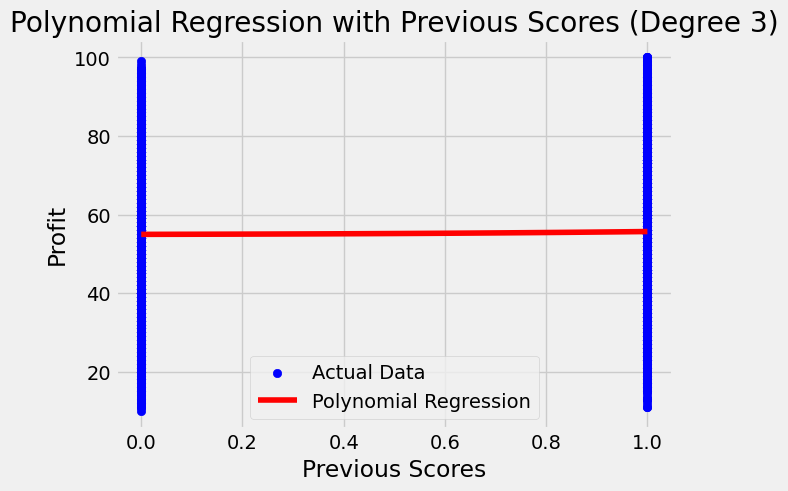


Polynomial Regression with Previous Scores (Degree 4):
MSE: 370.24136962048425
MAE: 16.206967341913447
RMSE: 19.241657143304582


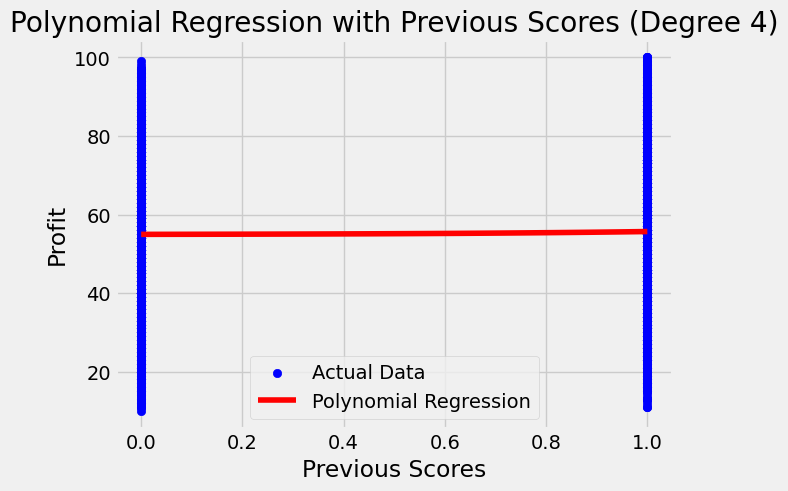


Polynomial Regression with Sleep Hours (Degree 2):
MSE: 322.00416498930946
MAE: 15.53878702202471
RMSE: 17.94447449744097


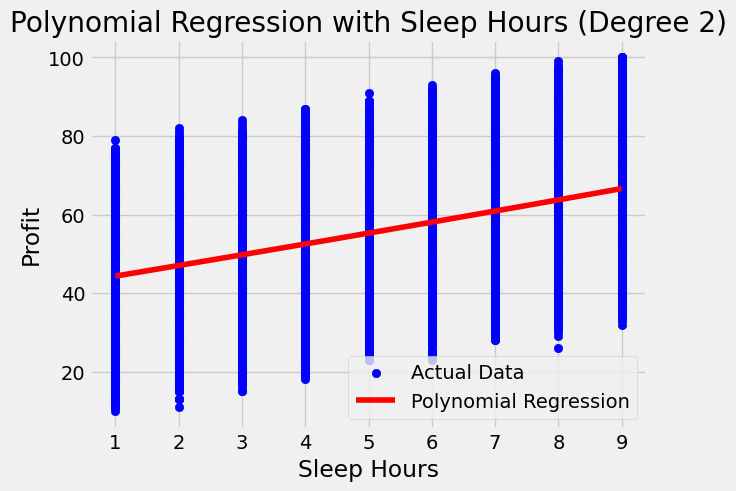


Polynomial Regression with Sleep Hours (Degree 3):
MSE: 322.08806624065994
MAE: 15.540678006752508
RMSE: 17.946812147026556


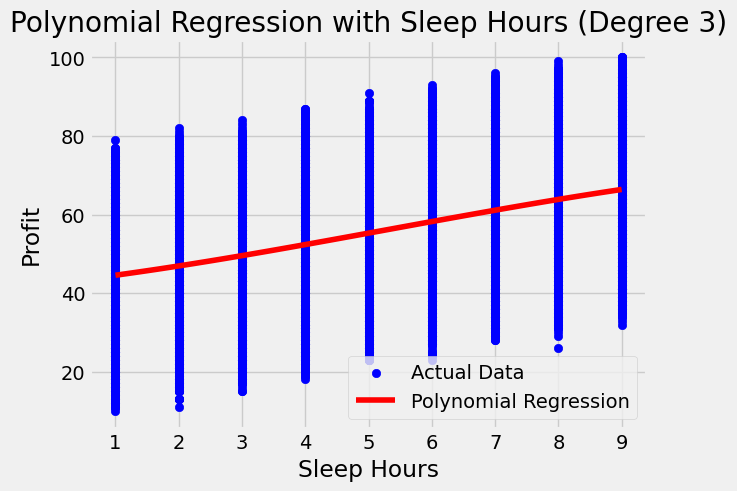


Polynomial Regression with Sleep Hours (Degree 4):
MSE: 322.1816642352957
MAE: 15.546105425467918
RMSE: 17.949419607198884


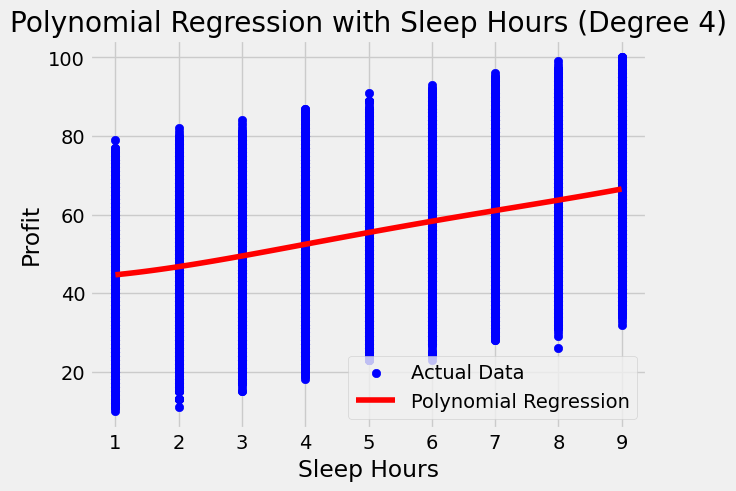


Polynomial Regression with Sample Question Papers Practiced (Degree 2):
MSE: 58.95250387765021
MAE: 6.558244972621786
RMSE: 7.6780533911695485


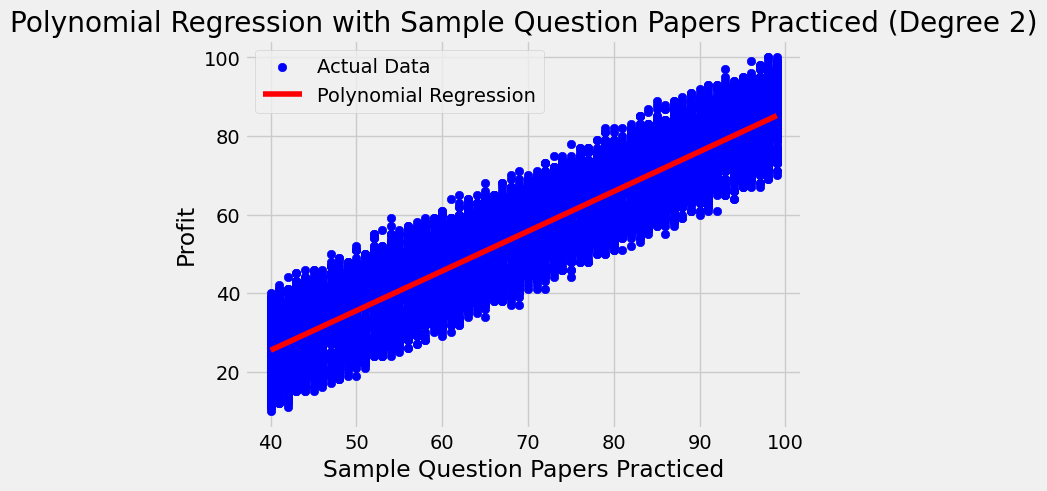


Polynomial Regression with Sample Question Papers Practiced (Degree 3):
MSE: 58.95681130548586
MAE: 6.558659208886588
RMSE: 7.678333888643151


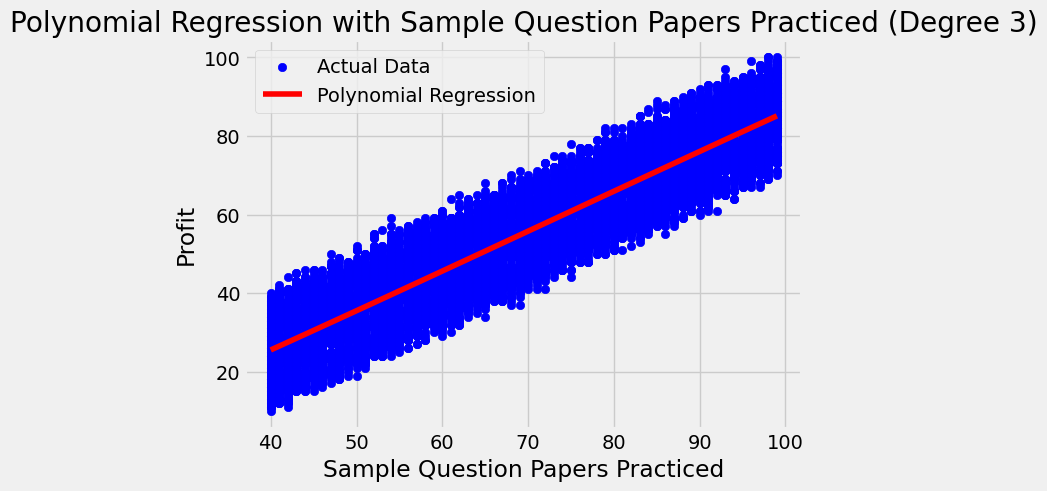


Polynomial Regression with Sample Question Papers Practiced (Degree 4):
MSE: 58.92181676386396
MAE: 6.557357355180548
RMSE: 7.676054765559191


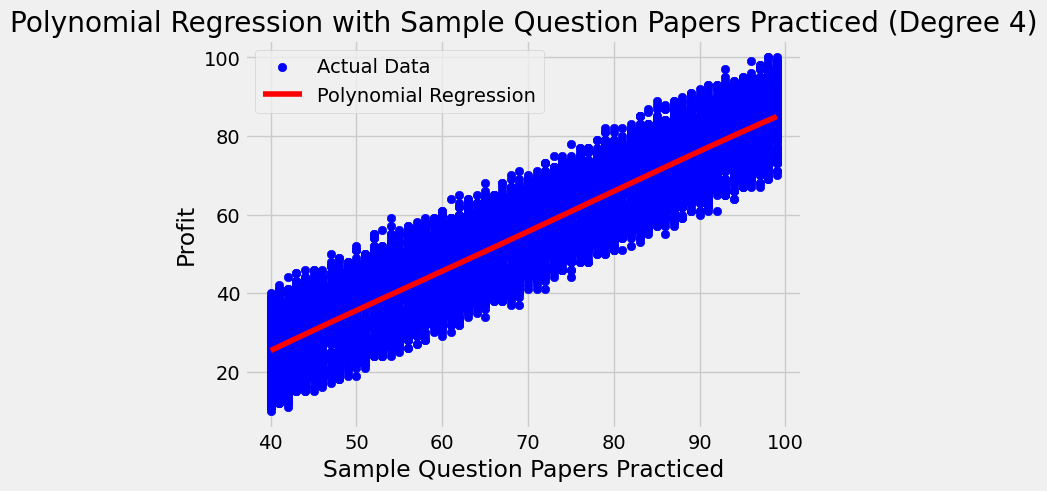


Polynomial Regression with Extracurricular Activities_No (Degree 2):
MSE: 369.5522839484476
MAE: 16.176029288007694
RMSE: 19.223742714374005


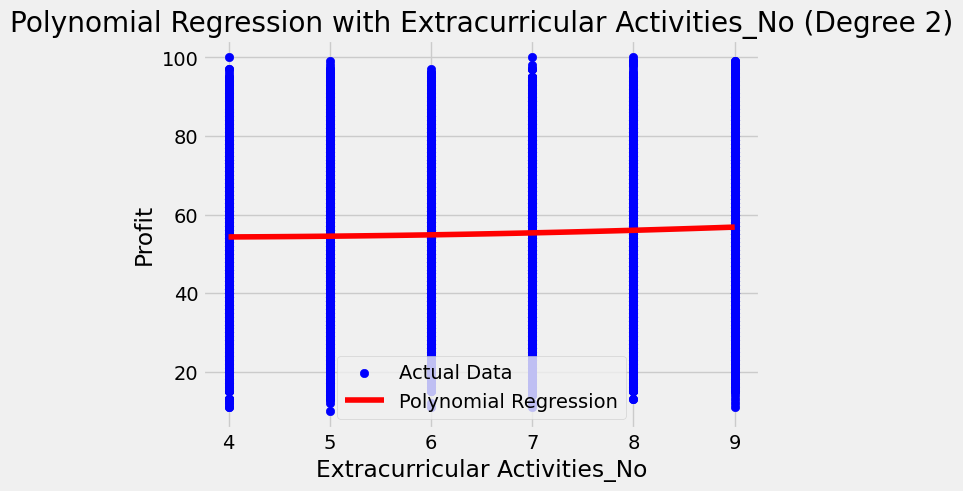


Polynomial Regression with Extracurricular Activities_No (Degree 3):
MSE: 369.622267448834
MAE: 16.17737057832797
RMSE: 19.22556286429175


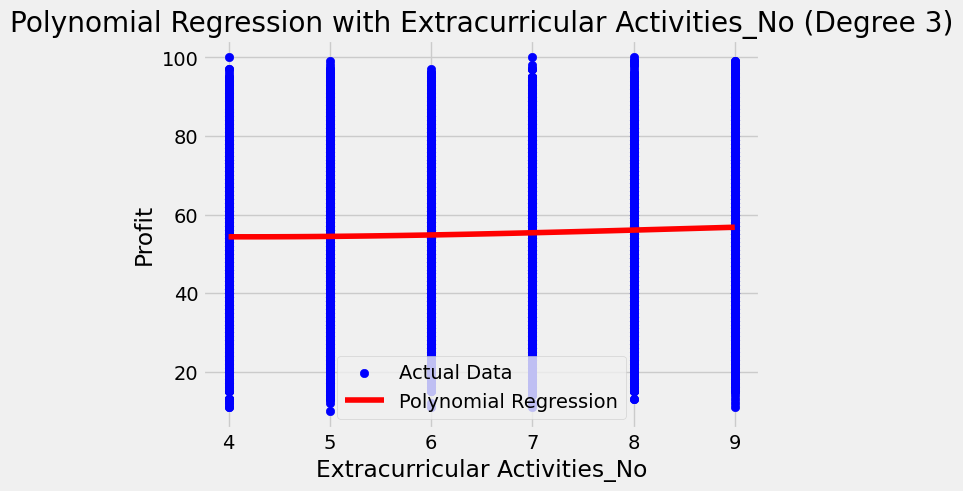


Polynomial Regression with Extracurricular Activities_No (Degree 4):
MSE: 369.8301726197493
MAE: 16.18058786970403
RMSE: 19.230969102459433


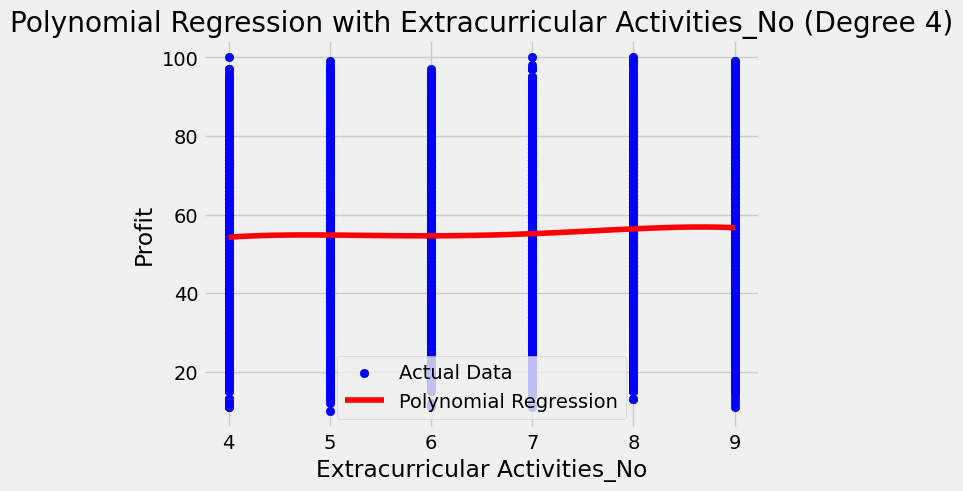


Polynomial Regression with Extracurricular Activities_Yes (Degree 2):
MSE: 370.300408847242
MAE: 16.20952443432431
RMSE: 19.24319123345299


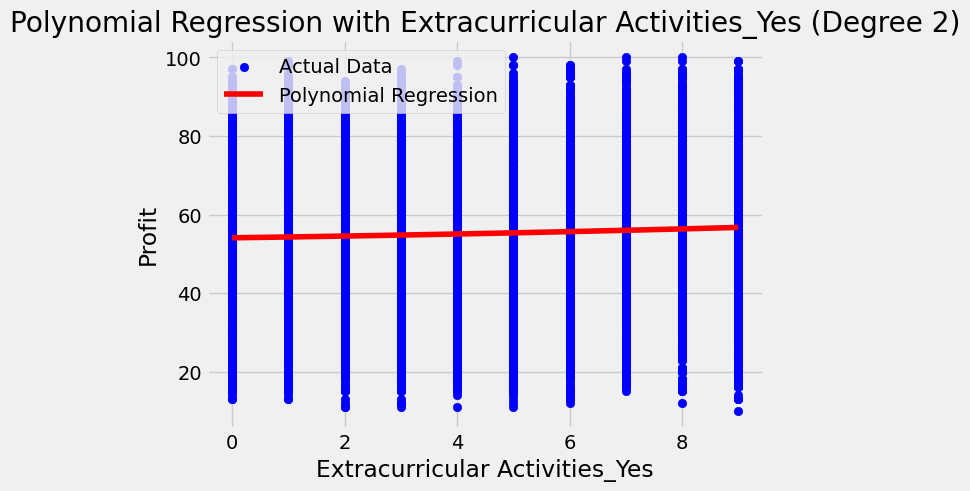


Polynomial Regression with Extracurricular Activities_Yes (Degree 3):
MSE: 370.0392506493633
MAE: 16.204077636831908
RMSE: 19.23640430666197


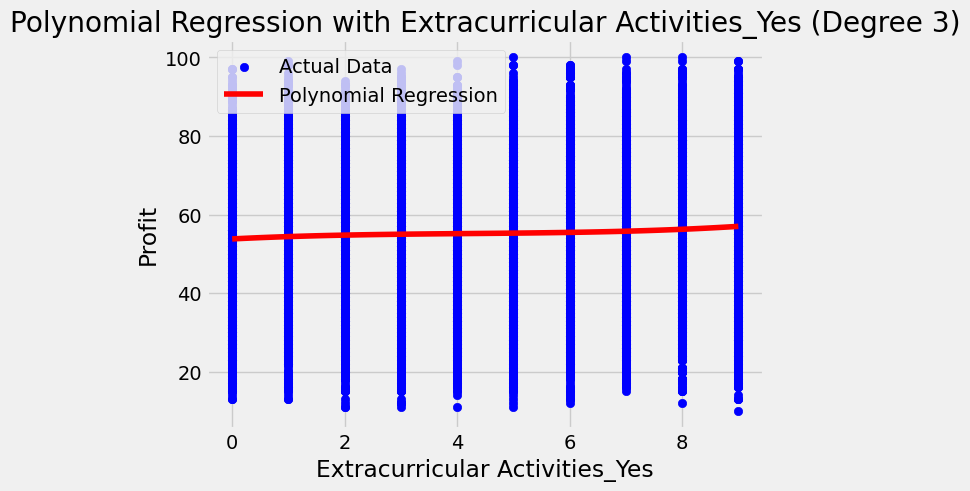


Polynomial Regression with Extracurricular Activities_Yes (Degree 4):
MSE: 369.99307783520436
MAE: 16.202775468579116
RMSE: 19.235204127723843


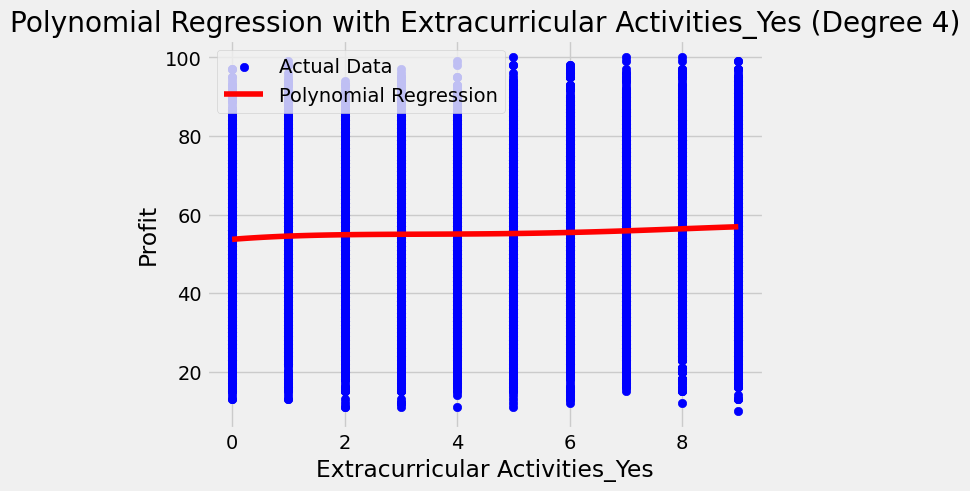

In [120]:
for i, predictor_name in enumerate(predictor_names):
    if predictor_name in ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced'] or predictor_name_new in encoded_feature_names_new:
        for degree in degrees:

            poly_features = PolynomialFeatures(degree=degree)
            X_poly = poly_features.fit_transform(X[:, i].reshape(-1, 1))

            X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

            poly_regressor = LinearRegression()
            poly_regressor.fit(X_train_poly, y_train)

            y_pred = poly_regressor.predict(X_test_poly)

            print(f"\nPolynomial Regression with {predictor_name} (Degree {degree}):")
            print("MSE:", metrics.mean_squared_error(y_test, y_pred))
            print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
            print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

            X_plot = np.linspace(X[:, i].min(), X[:, i].max(), 100).reshape(-1, 1)
            X_plot_poly = poly_features.transform(X_plot)
            y_plot_poly = poly_regressor.predict(X_plot_poly)

            plt.scatter(X[:, i], y, color='blue', label='Actual Data')
            plt.plot(X_plot, y_plot_poly, color='red', label='Polynomial Regression')
            plt.title(f"Polynomial Regression with {predictor_name} (Degree {degree})")
            plt.xlabel(predictor_name)
            plt.ylabel("Profit")
            plt.legend()
            plt.show()